In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from data_analysis.utils import user
from data.paths.parquet_paths import USER, REVIEW

In [3]:
user_df = pd.read_parquet(str(USER))
review_df = pd.read_parquet(str(REVIEW))

In [4]:
user_df = user.prepare_user_df(user_df)

In [5]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   name                10000 non-null  object        
 2   review_count        10000 non-null  int32         
 3   yelping_since       10000 non-null  datetime64[ns]
 4   friends             10000 non-null  object        
 5   useful              10000 non-null  int32         
 6   funny               10000 non-null  int32         
 7   cool                10000 non-null  int32         
 8   fans                10000 non-null  int32         
 9   elite               0 non-null      object        
 10  average_stars       10000 non-null  float32       
 11  compliment_hot      10000 non-null  int32         
 12  compliment_more     10000 non-null  int32         
 13  compliment_profile  10000 non-null  int32      

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float32
 4   date         100000 non-null  object 
 5   text         100000 non-null  object 
 6   useful       100000 non-null  int32  
 7   funny        100000 non-null  int32  
 8   cool         100000 non-null  int32  
dtypes: float32(1), int32(3), object(5)
memory usage: 5.3+ MB


In [7]:
# user_df['user_id'] = user_df['user_id'].astype(str)
# review_df['user_id'] = review_df['user_id'].astype(str)

user_columns = [
    'user_id',
    'name',
    'review_count',
    'yelping_since',
    # 'useful',
    # 'funny',
    # 'cool',
    'fans',
    'average_stars'
]


review_user_df = review_df.join(user_df[user_columns].set_index('user_id'), on='user_id')
review_user_df['date'] = pd.to_datetime(review_user_df['date'])

In [8]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   review_id      100000 non-null  object        
 1   user_id        100000 non-null  object        
 2   business_id    100000 non-null  object        
 3   stars          100000 non-null  float32       
 4   date           100000 non-null  datetime64[ns]
 5   text           100000 non-null  object        
 6   useful         100000 non-null  int32         
 7   funny          100000 non-null  int32         
 8   cool           100000 non-null  int32         
 9   name           8279 non-null    object        
 10  review_count   8279 non-null    float64       
 11  yelping_since  8279 non-null    datetime64[ns]
 12  fans           8279 non-null    float64       
 13  average_stars  8279 non-null    float32       
dtypes: datetime64[ns](2), float32(2), float64(2), int32(3

In [9]:
review_user_df = review_user_df.loc[~review_user_df['name'].isna()].copy()

In [10]:
review_user_df.sample(2)

,review_id,user_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars
30403,vkJcWDTdf9G66IsjUwLfng,FLnAOjMvsjX7SFPOGxUVHg,LpJvitnw7vU5UW-3KE9kjA,5.0,2008-08-26,what? they sell vosges products in whole foods...,0,0,0,Veggie,151.0,2008-02-28 08:28:37,6.0,4.16
40546,4gZetyhEtfG1DYeH88FWgg,nJbdqWu2t1WtpsRK8MuB_A,in1hs9ZPiywjuY1MpMZNkQ,1.0,2008-05-05,This is the place where all the rejects go whe...,1,1,1,jennifer,778.0,2006-04-17 18:06:57,138.0,3.28


<AxesSubplot: >

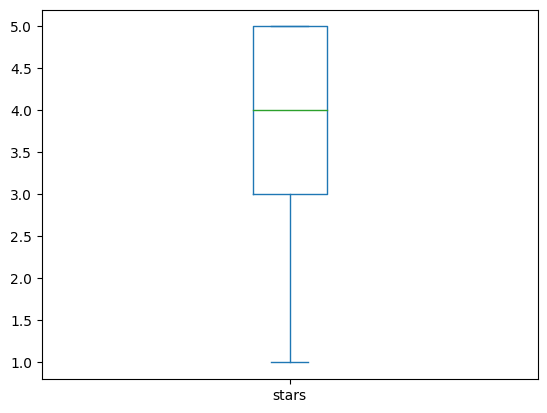

In [11]:
review_user_df.groupby('user_id')['stars'].mean().plot(kind='box')

In [12]:
# early reviews: within month or two after yelping since
youth_threshold = timedelta(days=60)
early_reviews = review_user_df[review_user_df.date - review_user_df.yelping_since < youth_threshold]

early_reviews[['date', 'yelping_since', 'stars', 'user_id']].sample(10)

early_reviews = early_reviews.groupby('user_id').agg(list)
early_reviews.reset_index(inplace=True)
early_reviews['count'] = early_reviews['name'].apply(lambda x: len(x))
early_reviews[early_reviews['count'] >= 3].sample(3)

,user_id,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
319,XNSyl47aXuPsvC5zXm5uhw,"[S9w_I4p3B2lFrjD02Xf1bA, DA3NWOjQSsYFee-Cm1RB-...","[EUQoB_ph7_xIyj7JZGI3bg, 3u2sE4tHMCRFcszy1FGF2...","[4.0, 5.0, 4.0, 3.0, 5.0, 4.0, 5.0, 4.0, 5.0, ...","[2009-03-05 00:00:00, 2009-03-06 00:00:00, 200...",[This place is awesome. It's a tiny little ho...,"[3, 2, 0, 1, 1, 2, 4, 2, 1, 2, 6, 1, 2]","[3, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1]","[3, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1]","[Bri, Bri, Bri, Bri, Bri, Bri, Bri, Bri, Bri, ...","[483.0, 483.0, 483.0, 483.0, 483.0, 483.0, 483...","[2009-03-03 15:49:50, 2009-03-03 15:49:50, 200...","[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32....","[3.640000104904175, 3.640000104904175, 3.64000...",13
25,0syC71vtTGGzSeGzfTR6vw,"[9v3aWU9h15NNT76aj0UQuA, dl3WH6sCfmPquJ8lykMVr...","[nnDLapJk1z2NJE0-XzwMlQ, OK0ba4X5seibH8oMWh4bh...","[4.0, 5.0, 4.0]","[2009-03-08 00:00:00, 2009-03-10 00:00:00, 200...",[yay Gallagher's! One of my favorite places a...,"[3, 1, 1]","[1, 1, 1]","[2, 1, 1]","[Cindy, Cindy, Cindy]","[38.0, 38.0, 38.0]","[2009-02-28 16:20:39, 2009-02-28 16:20:39, 200...","[3.0, 3.0, 3.0]","[3.8499999046325684, 3.8499999046325684, 3.849...",3
61,5Kbn1FjXmS7Jypz3_ybt_Q,"[_mKKcQEcClgg69pLql-2CQ, gWWX-bdEpQXqUkVAbdn6H...","[VgGO13Fx7dQj4zg3IuVDLw, Dw4qOCZYT3ge2lGvXmet7...","[2.0, 4.0, 3.0, 4.0]","[2006-01-14 00:00:00, 2006-01-14 00:00:00, 200...",[Definitely a mixed crowd as stated before. D...,"[0, 0, 0, 2]","[0, 0, 0, 1]","[0, 0, 0, 1]","[Kelly, Kelly, Kelly, Kelly]","[91.0, 91.0, 91.0, 91.0]","[2006-01-14 04:33:56, 2006-01-14 04:33:56, 200...","[10.0, 10.0, 10.0, 10.0]","[4.03000020980835, 4.03000020980835, 4.0300002...",4


In [13]:
review_bursts = review_user_df.groupby(['user_id', 'date']).agg(list)
review_bursts.reset_index(inplace=True)
review_bursts['count'] = review_bursts['name'].apply(lambda x: len(x))
review_bursts[review_bursts['count'] >= 3].sample(3)

,user_id,date,review_id,business_id,stars,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
7409,wXi-P691AGOdonMy1TrL7w,2010-01-10,"[-YIicJCTaAwN4SnvMQICrw, 01iRuws83ozzlrUH-sUdH...","[FYBvbA08gi71dLc-RxqxKQ, eo3kAvg_1622OmbxjWKEg...","[4.0, 3.0, 4.0]",[I live really close to Edmonton Trail and oft...,"[8, 1, 7]","[1, 0, 0]","[2, 0, 0]","[Katie, Katie, Katie]","[367.0, 367.0, 367.0]","[2009-09-25 23:13:32, 2009-09-25 23:13:32, 200...","[34.0, 34.0, 34.0]","[3.690000057220459, 3.690000057220459, 3.69000...",3
7007,sTcYq6goD1Fa2WS9MSkSvQ,2011-08-27,"[4DAWSTGnfTRGBdEVz1IIqA, ZuC-598iiFN2hIeHsFUG4...","[VoTi4yVhTVyFdmxUpoyUsg, yHBhLawYmIthUPLbUXK5k...","[5.0, 2.0, 3.0]",[Aye Dios Mios! I think I have died and gone ...,"[9, 6, 3]","[7, 1, 1]","[7, 2, 2]","[Sunny, Sunny, Sunny]","[841.0, 841.0, 841.0]","[2007-08-20 16:17:27, 2007-08-20 16:17:27, 200...","[116.0, 116.0, 116.0]","[3.619999885559082, 3.619999885559082, 3.61999...",3
4867,benfF2qIwxDz7TCeF1XWIA,2011-03-23,"[jsPyjDJcX4QwwDuN0asQ0A, dqJdyOJTyVzDMD46ITV2G...","[k7VQD0pbdFN0Ju0yNVrtZQ, 7L7frgS9I4KeTkqPXh7w2...","[2.0, 5.0, 2.0]",[the waitresses are salty.\nthe food is medioc...,"[2, 3, 1]","[1, 0, 1]","[0, 1, 0]","[Tom, Tom, Tom]","[60.0, 60.0, 60.0]","[2011-03-23 00:21:53, 2011-03-23 00:21:53, 201...","[5.0, 5.0, 5.0]","[4.099999904632568, 4.099999904632568, 4.09999...",3


In [14]:
# ~14 years * ~50 weeks
bins_count = 700
review_user_df['date_bin'] = pd.cut(review_user_df['date'], bins=bins_count, labels=range(bins_count))

review_bursts_binned = review_user_df.groupby(['user_id', 'date_bin']).agg(list)
review_bursts_binned.reset_index(inplace=True)
review_bursts_binned = review_bursts_binned.dropna()
review_bursts_binned['count'] = review_bursts_binned['name'].apply(lambda x: len(x))
review_bursts_binned[review_bursts_binned['count'] >= 3].sample(3)

,user_id,date_bin,review_id,business_id,stars,date,text,useful,funny,cool,name,review_count,yelping_since,fans,average_stars,count
2260588,fiGqQ7pIGKyZ9G0RqWLMpg,288,"[AXx1hDGdjbMnW5PZzXTvXw, 2DF3QnESkEOO_IGe5EaOP...","[LEASX4wn1U1TAmwQfsDtIw, DyVteo8Blf5gEfC9QbJE9...","[3.0, 2.0, 4.0, 3.0]","[2010-10-05 00:00:00, 2010-10-11 00:00:00, 201...",[Small place with cheap food and cheap drinks-...,"[1, 1, 1, 1]","[0, 0, 0, 0]","[0, 0, 0, 2]","[Margret, Margret, Margret, Margret]","[1653.0, 1653.0, 1653.0, 1653.0]","[2010-05-04 16:22:45, 2010-05-04 16:22:45, 201...","[68.0, 68.0, 68.0, 68.0]","[4.03000020980835, 4.03000020980835, 4.0300002...",4
2531318,ko06Ptkr1YtZWR6FIDqubA,118,"[l2VUkKO6g9BRummH3xPOEQ, 9ofRzDMx26AHKWww9cljb...","[pS1NtKoIiQ10fJX6YsBUbw, d4qwVw4PcN-_2mK2o1Ro1...","[4.0, 4.0, 3.0]","[2007-06-21 00:00:00, 2007-06-21 00:00:00, 200...",[The Melting pot finally opened up an East Sid...,"[1, 0, 0]","[1, 0, 0]","[1, 0, 0]","[Jennifer, Jennifer, Jennifer]","[142.0, 142.0, 142.0]","[2007-05-20 00:21:24, 2007-05-20 00:21:24, 200...","[40.0, 40.0, 40.0]","[4.340000152587891, 4.340000152587891, 4.34000...",3
2843650,qewG3X2O4X6JKskxyyqFwQ,250,"[8hzHnxhiqt6iLNzAhib-ow, qMKodW3JKPkibyMcsDQnk...","[hubbaEcYPYEZu5Ziz6i0lw, VrGI7_nRjXpn0415S3coG...","[3.0, 5.0, 5.0, 5.0]","[2010-01-14 00:00:00, 2010-01-09 00:00:00, 201...",[We were heading south to the M Resort to catc...,"[7, 24, 3, 9]","[1, 10, 1, 1]","[1, 15, 2, 4]","[Misti, Misti, Misti, Misti]","[907.0, 907.0, 907.0, 907.0]","[2010-01-08 23:29:22, 2010-01-08 23:29:22, 201...","[734.0, 734.0, 734.0, 734.0]","[3.950000047683716, 3.950000047683716, 3.95000...",4


In [15]:
early_reviewers = set(early_reviews['user_id'])
oneday_burst_reviewers = set(review_bursts['user_id'])
oneweek_burst_reviewers = set(review_bursts_binned['user_id'])

print(f'1d / 1w: {len(oneday_burst_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1w: {len(early_reviewers.intersection(oneweek_burst_reviewers))}')
print(f'early / 1d: {len(early_reviewers.intersection(oneday_burst_reviewers))}')

1d / 1w: 4692
early / 1w: 558
early / 1d: 558


In [16]:
from data.paths.parquet_paths import BUSINESS
from data_analysis.utils import business

business_df = pd.read_parquet(str(BUSINESS))
business_df = business.prepare_business_df(business_df)
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, iBof5Tl8vrKISbi82tFEvQ to 9999
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   name                        10000 non-null  object 
 1   address                     10000 non-null  object 
 2   city                        10000 non-null  object 
 3   state                       10000 non-null  object 
 4   postal_code                 10000 non-null  object 
 5   latitude                    10000 non-null  float32
 6   longitude                   10000 non-null  float32
 7   stars                       10000 non-null  float32
 8   review_count                10000 non-null  float64
 9   is_open                     10000 non-null  float64
 10  categories                  10000 non-null  object 
 11  hours                       7716 non-null   object 
 12  AcceptsInsurance            413 non-null    object 
 13  AgesAllowed     

In [17]:
# Searching for home state
# taking users activity
# grouping by user
# checking for the most visted / visited for longest time

review_place_df = review_user_df[['user_id', 'business_id', 'date']]
review_place_df = review_place_df.join(business_df[['city', 'state', 'latitude', 'longitude']], rsuffix='_business', on='business_id')
review_place_df = review_place_df.dropna()
review_place_df

,user_id,business_id,date,city,state,latitude,longitude
3,zEOuNc4K40aw-GE6y8RgIg,Y6FNieFd5UKhJ3a6FbQhyg,2014-07-28,Gilbert,AZ,33.378639,-111.755966
34,fJezNrc49UX9gONGNJ4YUQ,4gwh0q7JsdzHIm_pdYUlZg,2013-02-22,Scottsdale,AZ,33.539532,-111.924576
82,UYcmGbelzRa0Q6JqzLoguw,Er5XAY2UFGGqBHdqpeCFkA,2013-08-04,Las Vegas,NV,36.010628,-115.174904
87,whqfWVBj4x5EDboIVDOymQ,CsLQLiRoafpJPJSkNX2h5Q,2010-03-13,Charlotte,NC,35.194893,-80.767441
93,Y1ICO26IsN7i_1OVD0Inyw,GHs7grPeyVPwmiVKhhfMvg,2008-05-02,Glendale,AZ,33.534256,-112.261200
...,...,...,...,...,...,...,...
99827,Wmh9vK9LX-sxeuTb6vzM2A,36pB0QVVNZuOLV_UxosbAQ,2018-08-27,Montréal,QC,45.479313,-73.584496
99830,U13tLFucJNz1fNv_Xgdj0g,WCqcYtJ4rUxA4bIzjOfzqg,2013-05-11,Charlotte,NC,35.226147,-80.844231
99856,PYRIiQilTl1rkx83hm8ttA,LHXisknIbUy_XtdEQc7x9w,2014-05-13,Las Vegas,NV,36.060051,-115.164833
99892,SBsQvmEEYJsD6xeRzHxf8Q,aRqxT28Tdz2aDiZ7Vkyejw,2013-06-01,Toronto,ON,43.664177,-79.414963


In [18]:
state_mode = (review_place_df
    .groupby(['user_id'])['state']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))
city_mode = (review_place_df
    .groupby(['user_id'])['city']
    .agg(lambda x: pd.Series.mode(x)[0])
    .reset_index()
    .set_index('user_id'))

user_home_byvisits = state_mode.join(city_mode, on='user_id')
user_home_byvisits.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [19]:
# How to check by time?
# for each pair of reviews from same state/city count deltas between visits, max delta is homestate, homecity
from itertools import combinations

state_delta = review_place_df.groupby(['user_id', 'state']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
    
state_mode_time = (state_delta.groupby(['user_id', 'state'])
    .max()
    .reset_index()[['user_id', 'state']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

city_delta = review_place_df.groupby(['user_id', 'city']).apply(lambda x:
    sum(map(lambda dates: abs((dates[1] - dates[0]).days), combinations(x['date'], 2))))
city_mode_time = (city_delta.groupby(['user_id', 'city'])
    .max()
    .reset_index()[['user_id', 'city']]
    .drop_duplicates(['user_id'])
    .set_index('user_id'))

user_home_bydelta = state_mode_time.join(city_mode_time, on='user_id')
user_home_bydelta.reset_index()

,user_id,state,city
0,---1lKK3aKOuomHnwAkAow,NV,Las Vegas
1,--RlSfc-QmcHFGHyX6aVjA,NV,Las Vegas
2,-1BrzE0pqO_EVw9SGzHEnw,NV,Las Vegas
3,-6J2VjbeLWAHsyAB8VN7bA,AZ,Glendale
4,-6iqrpnSPBW2plS8y7-cLA,NC,Charlotte
...,...,...,...
2750,zwmw_cNa5DzJotaFOHTvQg,AZ,Scottsdale
2751,zx6gq8IslnAwCyCUztXn1A,AZ,Scottsdale
2752,zy2ImADN9B0cvIRCC3d0Zg,AZ,Gilbert
2753,zyNGr5Tlg1rK1frevXCx2g,AZ,Scottsdale


In [20]:
user_home_byvisits.compare(user_home_bydelta, keep_shape=True).dropna()

state              city           
                        self other        self      other
user_id                                                  
37HswRimgBEf7_US-c3CDA    NV    NC   Las Vegas  Charlotte
CxDOIDnH8gp9KXzpBHJYXw    ON    OH     Markham  Cleveland
U4INQZOPSUaj8hMjLlZ3KA    NV    AZ   Las Vegas  Henderson
hLVq7VSJBHZwqurwWoCmpg    PA    NV  Pittsburgh  Las Vegas

In [21]:
review_user_df = review_user_df.join(business_df[['state', 'city', 'longitude', 'latitude']], on='business_id')
review_user_df['state'].dropna()

3        AZ
34       AZ
82       NV
87       NC
93       AZ
         ..
99827    QC
99830    NC
99856    NV
99892    ON
99944    PA
Name: state, Length: 4023, dtype: object

In [22]:
review_user_df = review_user_df.join(user_home_byvisits['state'], on='user_id', rsuffix='_user')
review_user_df['state_user'].dropna()

3        AZ
34       AZ
36       AZ
66       NV
68       AZ
         ..
99916    AZ
99920    NC
99924    AZ
99935    NV
99944    PA
Name: state_user, Length: 6044, dtype: object

In [23]:
review_user_df['origin'] = review_user_df.apply(lambda x:
    'unknown' if x.state is None or x.state_user is None else 
    'local' if x.state == x.state_user 
    else 'tourist', 
    axis=1)

review_user_df = review_user_df.drop(['state_user'], axis=1)

In [24]:
review_user_df[['review_id', 'business_id', 'origin']].sample(10)

,review_id,business_id,origin
33955,eMOr3okcKVppJniDzyLRbQ,rcaPajgKOJC2vo_l3xa42A,local
32692,zryJj2-_er_jqWoqzyZupA,X0adELqBs5zAl3n5mRwihQ,tourist
27301,3nlqdg6bAqMfIl8vgdIoqQ,XZbuPXdyA0ZtTu3AzqtQhg,tourist
79424,_s0nL7EOjo168gipW3J16A,6ZIHxvFTHC1pvAzAS0uLDA,local
80508,rLlwmmi1sYetkPIiMRukdA,Fo2woDmc7zzHfsYIZ38YdA,local
72264,gG_cu9ZTwKoOlpvuvr636g,MNaPOkqm2vKeNG8EqkZWCg,local
59005,BbpZS-jOsZEuzyBOgNWISg,gy5pr5bFAjOL5rERSdMCLg,tourist
88329,5wBpa7UKj5JHoCtEQKQ_jA,UCpUOtvqR-NBWBNVMzJleA,tourist
38834,ze-OZk9WOhEe4bbdsHEeqA,62HlThvB9Rm2QFu_OdXe7w,local
82144,dIzmea7jOZumkIW7xUCXnw,d4qwVw4PcN-_2mK2o1Ro1g,tourist


In [25]:
local_reviews = review_user_df[review_user_df['origin'] == 'local'][['business_id', 'stars']]
local_reviews

,business_id,stars
3,Y6FNieFd5UKhJ3a6FbQhyg,4.0
34,4gwh0q7JsdzHIm_pdYUlZg,5.0
82,Er5XAY2UFGGqBHdqpeCFkA,4.0
87,CsLQLiRoafpJPJSkNX2h5Q,3.0
93,GHs7grPeyVPwmiVKhhfMvg,2.0
...,...,...
99827,36pB0QVVNZuOLV_UxosbAQ,5.0
99830,WCqcYtJ4rUxA4bIzjOfzqg,4.0
99856,LHXisknIbUy_XtdEQc7x9w,4.0
99892,aRqxT28Tdz2aDiZ7Vkyejw,4.0


In [26]:
business_df['local_stars'] = business_df.index.to_series().apply(lambda x: 
    local_reviews[local_reviews['business_id'] == x]['stars'].mean())
business_df['local_stars'].sample(10)

1109                           NaN
5847                           NaN
2961                           NaN
M6hZs_gyj7xe2iuSfX-X2A         NaN
ZRP98FtOQkNHIZlmTAKDsg         NaN
6555                           NaN
4613                           NaN
ZGXd87vme_dDVYqr-HpRQQ    3.666667
8130                           NaN
8778                           NaN
Name: local_stars, dtype: float64

In [27]:
tourist_reviews = review_user_df[review_user_df['origin'] == 'tourist'][['business_id', 'stars']]
tourist_reviews

,business_id,stars
7,0TBTV3q6QXCn9vNhy3Xi2w,4.0
21,XZbuPXdyA0ZtTu3AzqtQhg,4.0
36,bAZnIuqxB9RHu-Mz_HBeJg,4.0
47,u_vPjx925UPEG9DFOAAvFQ,3.0
66,p0iEUamJVp_QpaheE-Nz_g,4.0
...,...,...
99914,-zbcosKSMGDhaZYN-CrcVA,4.0
99916,_4Gpn_NIM94D9OFucgfaJQ,3.0
99920,oLeNHOEqeuFFgDTprUNXqg,3.0
99924,I6ICIIZfZsp_J9hHmfhWhQ,5.0


In [28]:
business_df['tourist_stars'] = business_df.index.to_series().apply(lambda x: 
    tourist_reviews[tourist_reviews['business_id'] == x]['stars'].mean())
business_df['tourist_stars'].sample(10)

2553                     NaN
cImc5mW-NYzKT3V8kf32WA   NaN
6193                     NaN
9451                     NaN
rNqSjfRM09T-VOjRTAF66g   NaN
T6Av7WQAvJhjpWEu_TVfHw   NaN
7uGsMlo8_uIZIITKfhEARA   NaN
wNcCAwIFDiw6rhHBmdErvw   NaN
9Mihbdu84mcRg-XvkOLZ9g   NaN
9990                     NaN
Name: tourist_stars, dtype: float64

In [29]:
business_df[['stars', 'local_stars', 'tourist_stars']].dropna().sample(10)

,stars,local_stars,tourist_stars
UT6L3b7Zll_nvRidijiDSA,4.0,3.300000,4.0
ogpiys3gnfZNZBTEJw5-1Q,4.0,3.500000,4.0
in1hs9ZPiywjuY1MpMZNkQ,3.5,3.052632,2.5
7EZ4Eu7YJ1ltRCC5jXFJrQ,2.5,2.393939,2.0
sACSJpBOQ4zPtjsv9trf4Q,4.0,5.000000,5.0
dfHA5n6e3f58nMCNHt589Q,3.5,2.800000,3.0
YD0pXftQUpyLmEKfiog2ug,5.0,5.000000,5.0
nF5TXLMmC6IJgQxE9CEZPw,3.0,3.500000,4.0
Rb2s2-2kIvbPXnPEuM_OBg,3.0,3.318182,5.0
_G1C1J-syqfRxD0tqTvEuw,4.5,4.000000,5.0


In [31]:
review_user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8279 entries, 3 to 99944
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   review_id      8279 non-null   object        
 1   user_id        8279 non-null   object        
 2   business_id    8279 non-null   object        
 3   stars          8279 non-null   float32       
 4   date           8279 non-null   datetime64[ns]
 5   text           8279 non-null   object        
 6   useful         8279 non-null   int32         
 7   funny          8279 non-null   int32         
 8   cool           8279 non-null   int32         
 9   name           8279 non-null   object        
 10  review_count   8279 non-null   float64       
 11  yelping_since  8279 non-null   datetime64[ns]
 12  fans           8279 non-null   float64       
 13  average_stars  8279 non-null   float32       
 14  date_bin       8279 non-null   category      
 15  origin         8279 